In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/lalu-lintas/Gunung Sahari - Jl. Mangga Besar.csv
/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Gatot Subroto.csv
/kaggle/input/lalu-lintas/DI Panjaitan - Jl. Kalimalang.csv
/kaggle/input/lalu-lintas/Ahmad Yani - Jl.H.Ten.csv
/kaggle/input/lalu-lintas/Ahmad Yani- Jl.Pemuda.csv
/kaggle/input/lalu-lintas/Jl.Jembatan 2 Raya - Jl.Tubagus Angke.csv
/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Tomang Raya.csv
/kaggle/input/lalu-lintas/Jl. Gatot Subroto - Jl. H. R. Rasuna Said.csv
/kaggle/input/lalu-lintas/Perintis Kemerdekaan - Jl. Letjen Suprapto.csv
/kaggle/input/lalu-lintas/Jl.Kyai Tapa - Jl.Daan Mogot(Grogol)3.csv
/kaggle/input/addition/Jl.Kyai Tapa - Jl.Daan Mogot(Grogol)3 (1).csv


In [2]:
from sklearn.preprocessing import StandardScaler

from sklearn.manifold import TSNE

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import davies_bouldin_score

from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score

In [3]:
df1 = pd.read_csv('/kaggle/input/lalu-lintas/Ahmad Yani - Jl.H.Ten.csv')
df2 = pd.read_csv('/kaggle/input/lalu-lintas/Ahmad Yani- Jl.Pemuda.csv')
df3 = pd.read_csv('/kaggle/input/lalu-lintas/DI Panjaitan - Jl. Kalimalang.csv')
df4 = pd.read_csv('/kaggle/input/lalu-lintas/Gunung Sahari - Jl. Mangga Besar.csv')
df5 = pd.read_csv('/kaggle/input/lalu-lintas/Jl. Gatot Subroto - Jl. H. R. Rasuna Said.csv')
df6 = pd.read_csv('/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Gatot Subroto.csv')
df7 = pd.read_csv('/kaggle/input/lalu-lintas/Jl. Letjen S. Parman - Jl. Tomang Raya.csv')
df8 = pd.read_csv('/kaggle/input/lalu-lintas/Jl.Jembatan 2 Raya - Jl.Tubagus Angke.csv')
df9 = pd.read_csv('/kaggle/input/lalu-lintas/Jl.Kyai Tapa - Jl.Daan Mogot(Grogol)3.csv')
df10 = pd.read_csv('/kaggle/input/lalu-lintas/Perintis Kemerdekaan - Jl. Letjen Suprapto.csv')

In [4]:
df9['simpang'] = 'Jl.Kyai Tapa - Jl.Daan Mogot'
df8['simpang'] = 'Jl.Jembatan 2 Raya - Jl.Tubagus Angke'
df7['simpang'] = 'Jl. Letjen S. Parman - Jl. Tomang Raya'
df6['simpang'] = 'Jl. Letjen S. Parman - Jl. Gatot Subroto'
df5['simpang'] = 'Jl. Gatot Subroto - Jl. H. R. Rasuna Said'
df8.drop(columns=['asal','tujuan'],inplace=True)
df7.drop(columns=['asal','tujuan'],inplace=True)
df6.drop(columns=['asal','tujuan'],inplace=True)
df5.drop(columns=['asal','tujuan'],inplace=True)


In [5]:
df_final = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10])
df_final['Time'] = pd.to_datetime(df_final['Time'])
df_final = df_final[df_final['Time'].dt.month > 5]
# Extract unique values from different columns
unique_origins = df_final['origin'].unique()
unique_destinations = df_final['destination'].unique()
unique_simpangs = df_final['simpang'].unique()
unique_base_duration = df_final['base_duration'].unique()
unique_length = df_final['length'].unique()

# Create DataFrames from the unique values
df_origins = pd.DataFrame({'origin': unique_origins})
df_destinations = pd.DataFrame({'destination': unique_destinations})
df_simpangs = pd.DataFrame({'simpang': unique_simpangs})
df_base_duration = pd.DataFrame({'base_duration': unique_base_duration})
df_length = pd.DataFrame({'length': unique_length})
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Concatenate the DataFrames
df_data = pd.concat([df_origins, df_destinations, df_simpangs,df_base_duration,df_length], axis=1)
df_data.loc[df_data['simpang'] == 'Jl.Kyai Tapa - Jl.Daan Mogot', 'base_duration'] = 51
df_data.loc[df_data['simpang'] == 'Perintis Kemerdekaan - Jl. Letjen Suprapto', 'base_duration'] = 55
df_data.loc[df_data['simpang'] == 'Perintis Kemerdekaan - Jl. Letjen Suprapto','length'] = 498
df_data.loc[df_data['simpang'] == 'Jl. Gatot Subroto - Jl. H. R. Rasuna Said', 'base_duration'] = 74
df_data.loc[df_data['simpang'] == 'Jl. Gatot Subroto - Jl. H. R. Rasuna Said', 'base_duration'] = 57
df_data.loc[df_data['simpang'] == 'Perintis Kemerdekaan - Jl. Letjen Suprapto','length'] = 497
# df_data['simpang'] = label_encoder.fit_transform(df_data['simpang'])
df_data

,origin,destination,simpang,base_duration,length
0,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",Ahmad Yani - Jl.H.Ten,86.0,505.0
1,"(-6.194008633407266, 106.87463608592118)","(-6.192548487595325, 106.87765237073411)",Ahmad Yani- Jl.Pemuda,48.0,497.0
2,"(-6.241892424883742, 106.87701091066995)","(-6.239785640534078, 106.88008894724322)",DI Panjaitan - Jl. Kalimalang,74.0,496.0
3,"(-6.1470373284202475, 106.83436860847227)","(-6.148648065484272, 106.8325822573163)",Gunung Sahari - Jl. Mangga Besar,82.0,501.0
4,"(-6.238250488126058, 106.82911433892662)","(-6.235162872770016, 106.82826676090355)",Jl. Gatot Subroto - Jl. H. R. Rasuna Said,57.0,513.0
5,"(-6.198869732635176, 106.7986185941223)","(-6.202892165528399, 106.80056625319281)",Jl. Letjen S. Parman - Jl. Gatot Subroto,80.0,499.0
6,"(-6.181968895791145, 106.79653119893334)","(-6.178680005423234, 106.79761100797312)",Jl. Letjen S. Parman - Jl. Tomang Raya,51.0,487.0
7,"(-6.140605535454446, 106.79346734578937)","(-6.143144965365648, 106.79151070334552)",Jl.Jembatan 2 Raya - Jl.Tubagus Angke,55.0,498.0
8,"(-6.166979462851707, 106.79020879047034)","(-6.166392791358842, 106.78588506965443)",Jl.Kyai Tapa - Jl.Daan Mogot,51.0,485.0
9,"(-6.167151529252891, 106.88094231348498)","(-6.166575524707153, 106.87655421965444)",Perintis Kemerdekaan - Jl. Letjen Suprapto,55.0,497.0


In [6]:
df_final[['base_duration','length']][df_final['simpang']==
                                     'Perintis Kemerdekaan - Jl. Letjen Suprapto'].iloc[0]

base_duration     55
length           498
Name: 169, dtype: int64

##### Preprocessing

In [7]:
df_final['Jam'] = df_final['Time'].dt.hour
df_final['Menit'] = df_final['Time'].dt.minute
df_final['Kecepatan_normal'] = df_final['length'] / df_final['base_duration']
df_final.head()

,Unnamed: 0,Time,origin,destination,travel_time_seconds,base_duration,length,simpang,Jam,Menit,Kecepatan_normal
170,170,2023-06-01 06:00:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",84,86,505,Ahmad Yani - Jl.H.Ten,6,0,5.872093
171,171,2023-06-01 06:15:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",84,86,505,Ahmad Yani - Jl.H.Ten,6,15,5.872093
172,172,2023-06-01 06:30:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",86,86,505,Ahmad Yani - Jl.H.Ten,6,30,5.872093
173,173,2023-06-01 06:45:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",87,86,505,Ahmad Yani - Jl.H.Ten,6,45,5.872093
174,174,2023-06-01 07:00:00,"(-6.190375973917029, 106.87510587543514)","(-6.189106614340076, 106.87729738512063)",89,86,505,Ahmad Yani - Jl.H.Ten,7,0,5.872093


In [8]:
# # Mengonversi kolom 'Time' menjadi tipe datetime
# df_final['Time'] = pd.to_datetime(df_final['Time'])

# # Mengatur kolom 'Time' sebagai indeks
# df_final.set_index('Time', inplace=True)

# # Memisahkan dataset untuk rentang waktu 06:00 - 10:00 pagi
# morning_data = df_final.between_time('06:00', '10:00')

# # Memisahkan dataset untuk rentang waktu 16:00 - 20:00
# afternoon_data = df_final.between_time('16:00', '20:00')
# df_final_morning = morning_data.reset_index()
# df_final_afternoon = afternoon_data.reset_index()

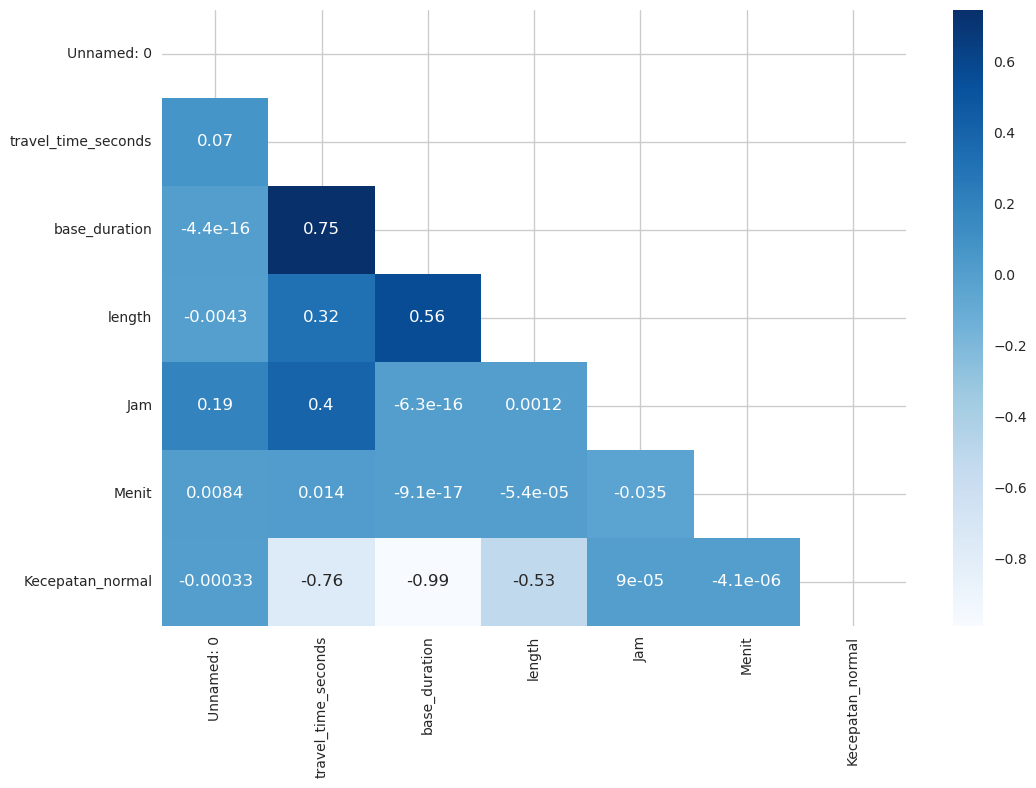

In [9]:
# check correlation between numerical features

corr = df_final.select_dtypes(include=['number']).corr()
plt.figure(figsize=(12,8))
#masking the upper triangle part (since matrix is repetitive)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap="Blues", annot=True)
plt.show()

In [10]:
df_final_fix = df_final.drop(columns=['Time','origin','destination','Unnamed: 0'])

# Scaling

In [11]:
# Mengonversi jam dan menit menjadi sudut dalam radian
df_final_fix['Jam_radian'] = 2 * np.pi * df_final_fix['Jam'] / 24
df_final_fix['Menit_radian'] = 2 * np.pi * df_final_fix['Menit'] / 60
# Menghitung sin dan cos dari sudut jam dan menit
df_final_fix['Jam_sin'] = np.sin(df_final_fix['Jam_radian'])
df_final_fix['Jam_cos'] = np.cos(df_final_fix['Jam_radian'])
df_final_fix['Menit_sin'] = np.sin(df_final_fix['Menit_radian'])
df_final_fix['Menit_cos'] = np.cos(df_final_fix['Menit_radian'])
df_final_fix.drop(columns=['Jam','Menit'],inplace=True)

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_final_fix['simpang'] = label_encoder.fit_transform(df_final_fix['simpang'])
df_final_fix

,travel_time_seconds,base_duration,length,simpang,Kecepatan_normal,Jam_radian,Menit_radian,Jam_sin,Jam_cos,Menit_sin,Menit_cos
170,84,86,505,0,5.872093,1.570796,0.000000,1.000000,6.123234e-17,0.000000e+00,1.000000e+00
171,84,86,505,0,5.872093,1.570796,1.570796,1.000000,6.123234e-17,1.000000e+00,2.832769e-16
172,86,86,505,0,5.872093,1.570796,3.141593,1.000000,6.123234e-17,5.665539e-16,-1.000000e+00
173,87,86,505,0,5.872093,1.570796,4.712389,1.000000,6.123234e-17,-1.000000e+00,-1.836970e-16
174,89,86,505,0,5.872093,1.832596,0.000000,0.965926,-2.588190e-01,0.000000e+00,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
335,81,55,498,9,9.054545,4.974188,0.000000,-0.965926,2.588190e-01,0.000000e+00,1.000000e+00
336,80,55,498,9,9.054545,4.974188,1.570796,-0.965926,2.588190e-01,1.000000e+00,2.832769e-16
337,80,55,498,9,9.054545,4.974188,3.141593,-0.965926,2.588190e-01,5.665539e-16,-1.000000e+00
338,77,55,498,9,9.054545,4.974188,4.712389,-0.965926,2.588190e-01,-1.000000e+00,-1.836970e-16


In [13]:
# from sklearn.preprocessing import StandardScaler
# # Inisialisasi StandardScaler
# scaler = StandardScaler()
# columns_to_scale = ['base_duration','length']
# # Terapkan StandardScaler pada kolom-kolom yang dipilih
# df_final_fix[columns_to_scale] = scaler.fit_transform(df_final_fix[columns_to_scale])

In [14]:
df_final_fix1 = np.array(df_final_fix['travel_time_seconds']).reshape(-1,1)

# Modeling Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

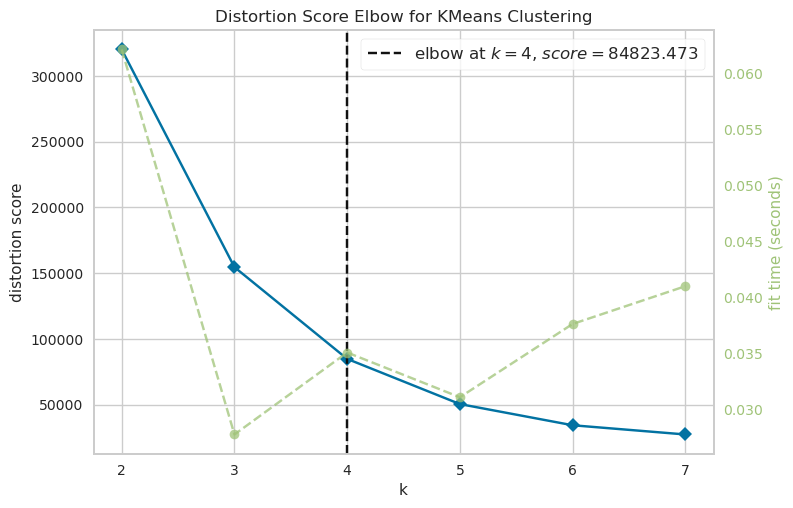

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#using Elbow Method
Elbow_fast = KElbowVisualizer(KMeans(random_state=42), k=7)
Elbow_fast.fit(df_final_fix1)
Elbow_fast.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


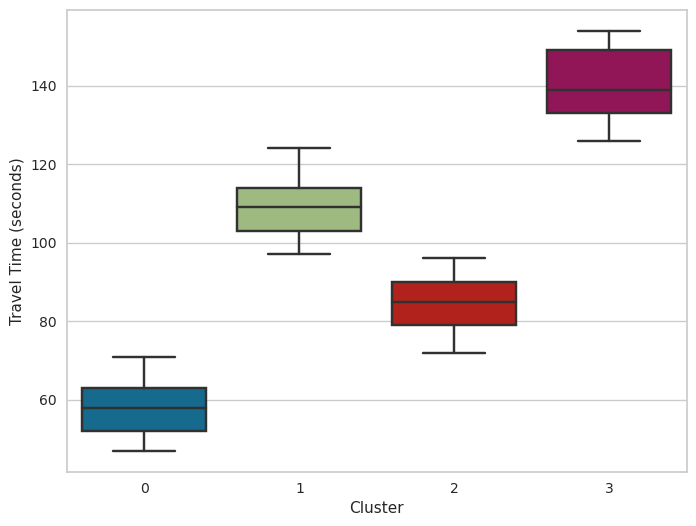

In [61]:
#fit
target_scaled = df_final_fix1
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=7)
kmeans_4.fit(target_scaled)

#predict
pred_4 = kmeans_4.predict(target_scaled)
#save it to origin preprocess_it df
df_final_fix['cluster'] = pred_4

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='travel_time_seconds', data=df_final_fix)
plt.xlabel('Cluster')
plt.ylabel('Travel Time (seconds)')
plt.savefig('boxplot.jpg', bbox_inches='tight')
plt.show()

In [31]:
df_final_fix['base_duration'].value_counts()

74    340
57    340
86    170
48    170
82    170
80    170
51    170
55    170
Name: base_duration, dtype: int64

In [28]:
# Evaluating our model
X = np.asarray(target_scaled)

#evaluation for k=4
#using silhouette score
sil_score = silhouette_score(X, kmeans_4.labels_, metric='euclidean')
#using davies bouldin score
dav_score = davies_bouldin_score(X, kmeans_4.labels_)

print('Silhouette Score: %.3f' % sil_score)
print('Davies Bouldin Score: %.3f' % dav_score)

Silhouette Score: 0.596
Davies Bouldin Score: 0.462


In [21]:
df_final_fix.cluster.value_counts()

1    609
3    540
2    460
0     91
Name: cluster, dtype: int64

# Modelling Regresi

In [22]:
df_final_fix.head()

,travel_time_seconds,base_duration,length,simpang,Kecepatan_normal,Jam_radian,Menit_radian,Jam_sin,Jam_cos,Menit_sin,Menit_cos,cluster
170,84,86,505,0,5.872093,1.570796,0.000000,1.000000,6.123234e-17,0.000000e+00,1.000000e+00,1
171,84,86,505,0,5.872093,1.570796,1.570796,1.000000,6.123234e-17,1.000000e+00,2.832769e-16,1
172,86,86,505,0,5.872093,1.570796,3.141593,1.000000,6.123234e-17,5.665539e-16,-1.000000e+00,1
173,87,86,505,0,5.872093,1.570796,4.712389,1.000000,6.123234e-17,-1.000000e+00,-1.836970e-16,1
174,89,86,505,0,5.872093,1.832596,0.000000,0.965926,-2.588190e-01,0.000000e+00,1.000000e+00,1


In [23]:
X_regresi, y_regresi = df_final_fix.drop(columns=['travel_time_seconds','cluster']), df_final_fix['travel_time_seconds']
print(X_regresi.shape)
print(y_regresi.shape)

(1700, 10)
(1700,)


In [24]:
X_regresi.head()

,base_duration,length,simpang,Kecepatan_normal,Jam_radian,Menit_radian,Jam_sin,Jam_cos,Menit_sin,Menit_cos
170,86,505,0,5.872093,1.570796,0.000000,1.000000,6.123234e-17,0.000000e+00,1.000000e+00
171,86,505,0,5.872093,1.570796,1.570796,1.000000,6.123234e-17,1.000000e+00,2.832769e-16
172,86,505,0,5.872093,1.570796,3.141593,1.000000,6.123234e-17,5.665539e-16,-1.000000e+00
173,86,505,0,5.872093,1.570796,4.712389,1.000000,6.123234e-17,-1.000000e+00,-1.836970e-16
174,86,505,0,5.872093,1.832596,0.000000,0.965926,-2.588190e-01,0.000000e+00,1.000000e+00


In [25]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
def smape(actual, predicted):
    absolute_errors = np.abs(predicted - actual)
    scaled_errors = 2 * absolute_errors / (np.abs(predicted) + np.abs(actual))
    return np.mean(scaled_errors) * 100


# Buat scorer khusus untuk sMAPE
smape_scorer = make_scorer(smape, greater_is_better=False)
kf= KFold(n_splits=5, shuffle=True, random_state=42)

## Random Forest Regressor

In [25]:
rfc = RandomForestRegressor(random_state=42)
mse_scores = cross_val_score(rfc,X_regresi, y_regresi, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", np.mean(-mse_scores))

smape_scores = cross_val_score(rfc, X_regresi, y_regresi, cv=kf, scoring=smape_scorer)
print("Average SMAPE:", np.mean(-smape_scores))

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = cross_val_score(rfc, X_regresi, y_regresi, cv=kf, scoring=make_scorer(rmse_scorer))
print("Average RMSE:", np.mean(rmse_scores))

Average MSE: 4.246177790861009
Average SMAPE: 1.7272716695940862
Average RMSE: 2.0592469297395604


# Random Forest Regressor Tuning

In [23]:
from time import time
import pprint
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
# A wrapper for measuring time and performances of different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params
# Setting the search space
search_spaces = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0),
    'min_impurity_decrease': Real(0.0, 1.0)
}

# Create a RandomForestRegressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create BayesSearchCV object
opt = BayesSearchCV(
    rf_regressor,
    search_spaces,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=1,
    n_iter=100,
    return_train_score=False,
    refit=True,
    verbose=100
)

# Report the best parameters
best_params = report_perf(opt,X_regresi, y_regresi, 'Random Forest Regressor')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=14, max_features=0.5678797590603701, min_impurity_decrease=0.7720781307895378, min_samples_leaf=5, min_samples_split=7, n_estimators=19
[CV 1/5; 1/1] END max_depth=14, max_features=0.5678797590603701, min_impurity_decrease=0.7720781307895378, min_samples_leaf=5, min_samples_split=7, n_estimators=19;, score=-16.311 total time=   0.1s
[CV 2/5; 1/1] START max_depth=14, max_features=0.5678797590603701, min_impurity_decrease=0.7720781307895378, min_samples_leaf=5, min_samples_split=7, n_estimators=19
[CV 2/5; 1/1] END max_depth=14, max_features=0.5678797590603701, min_impurity_decrease=0.7720781307895378, min_samples_leaf=5, min_samples_split=7, n_estimators=19;, score=-12.952 total time=   0.1s
[CV 3/5; 1/1] START max_depth=14, max_features=0.5678797590603701, min_impurity_decrease=0.7720781307895378, min_samples_leaf=5, min_samples_split=7, n_estimators=19
[CV 3/5; 1/1] END max_depth=14, max_features=

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.7s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.7s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.7s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.7s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.7s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.7s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.7s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.7s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.7s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 1/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.241 total time=   0.8s
[CV 2/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-3.670 total time=   0.8s
[CV 3/5; 1/1] START max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/1] END max_depth=13, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=-4.407 total time=   0.8s
[CV 4/5; 1/1] START max

In [26]:
rfc = RandomForestRegressor(max_depth=13,max_features=0.7655171217568351,
                           min_impurity_decrease=0,min_samples_leaf=1,min_samples_split=4,
                           random_state=42,n_estimators=86)
mse_scores = cross_val_score(rfc,X_regresi, y_regresi, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", np.mean(-mse_scores))

smape_scores = cross_val_score(rfc, X_regresi, y_regresi, cv=kf, scoring=smape_scorer)
print("Average SMAPE:", np.mean(-smape_scores))

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = cross_val_score(rfc, X_regresi, y_regresi, cv=kf, scoring=make_scorer(rmse_scorer))
print("Average RMSE:", np.mean(rmse_scores))

Average MSE: 4.212556336385005
Average SMAPE: 1.7196742025814395
Average RMSE: 2.0509627691824974


## XGB Regressor

In [27]:
xgb_model = xgb.XGBRegressor(random_state=42)
mse_scores = cross_val_score(xgb_model,X_regresi, y_regresi, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", np.mean(-mse_scores))

smape_scores = cross_val_score(xgb_model, X_regresi, y_regresi, cv=kf, scoring=smape_scorer)
print("Average SMAPE:", np.mean(-smape_scores))

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = cross_val_score(xgb_model, X_regresi, y_regresi, cv=kf, scoring=make_scorer(rmse_scorer))
print("Average RMSE:", np.mean(rmse_scores))

Average MSE: 4.267942739442985
Average SMAPE: 1.7290811418028553
Average RMSE: 2.0646314850630376


In [28]:
from time import time
import pprint
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestRegressor
# A wrapper for measuring time and performances of different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params
# Setting the search space
search_spaces = {
    'n_estimators': Integer(10, 200),
    'learning_rate': Real(0.01, 1.0),
    'max_depth': Integer(1, 20),
    'min_child_weight': Real(0.1, 10),
    'subsample': Real(0.1, 1.0),
    'colsample_bytree': Real(0.1, 1.0)
}

# Create a RandomForestRegressor
xgb = xgb_model

# Create BayesSearchCV object
opt = BayesSearchCV(
    xgb,
    search_spaces,
    scoring='neg_mean_squared_error',
    cv=kf,
    n_jobs=1,
    n_iter=100,
    return_train_score=False,
    refit=True,
    verbose=100
)

# Report the best parameters
best_params = report_perf(opt, X_regresi, y_regresi, 'XGboost')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.5259381954113076, learning_rate=0.7474848701780651, max_depth=11, min_child_weight=7.941107474787621, n_estimators=50, subsample=0.11395874870121785
[CV 1/5; 1/1] END colsample_bytree=0.5259381954113076, learning_rate=0.7474848701780651, max_depth=11, min_child_weight=7.941107474787621, n_estimators=50, subsample=0.11395874870121785;, score=-14.777 total time=   0.1s
[CV 2/5; 1/1] START colsample_bytree=0.5259381954113076, learning_rate=0.7474848701780651, max_depth=11, min_child_weight=7.941107474787621, n_estimators=50, subsample=0.11395874870121785
[CV 2/5; 1/1] END colsample_bytree=0.5259381954113076, learning_rate=0.7474848701780651, max_depth=11, min_child_weight=7.941107474787621, n_estimators=50, subsample=0.11395874870121785;, score=-13.461 total time=   0.1s
[CV 3/5; 1/1] START colsample_bytree=0.5259381954113076, learning_rate=0.7474848701780651, max_depth=11, min_child_weight=7

In [27]:
xgb_model_tuning = xgb.XGBRegressor(colsample_bytree=0.7531479220720669,
                            learning_rate=0.07974372814316427,
                            max_depth=10,
                            min_child_weight=10,
                            n_estimators=198,
                            subsample=0.88988017977814,random_state=42)
mse_scores = cross_val_score(xgb_model_tuning,X_regresi, y_regresi, cv=kf, scoring='neg_mean_squared_error')
print("Average MSE:", np.mean(-mse_scores))

smape_scores = cross_val_score(xgb_model_tuning, X_regresi, y_regresi, cv=kf, scoring=smape_scorer)
print("Average SMAPE:", np.mean(-smape_scores))

def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = cross_val_score(xgb_model_tuning, X_regresi, y_regresi, cv=kf, scoring=make_scorer(rmse_scorer))
print("Average RMSE:", np.mean(rmse_scores))

Average MSE: 4.121368354270423
Average SMAPE: 1.714439199121415
Average RMSE: 2.0284286153317788


In [28]:
xgb_model_tuning.fit(X_regresi, y_regresi)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7531479220720669, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07974372814316427,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=10, missing=nan, monotone_constraints=None,
             n_estimators=198, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [30]:
import pickle 
pickle.dump(xgb_model_tuning,open('prediksi_regresi.sav','wb'))

In [31]:
xgb_model_tuning.feature_names_in_

array(['base_duration', 'length', 'simpang', 'Kecepatan_normal',
       'Jam_radian', 'Menit_radian', 'Jam_sin', 'Jam_cos', 'Menit_sin',
       'Menit_cos'], dtype='<U16')

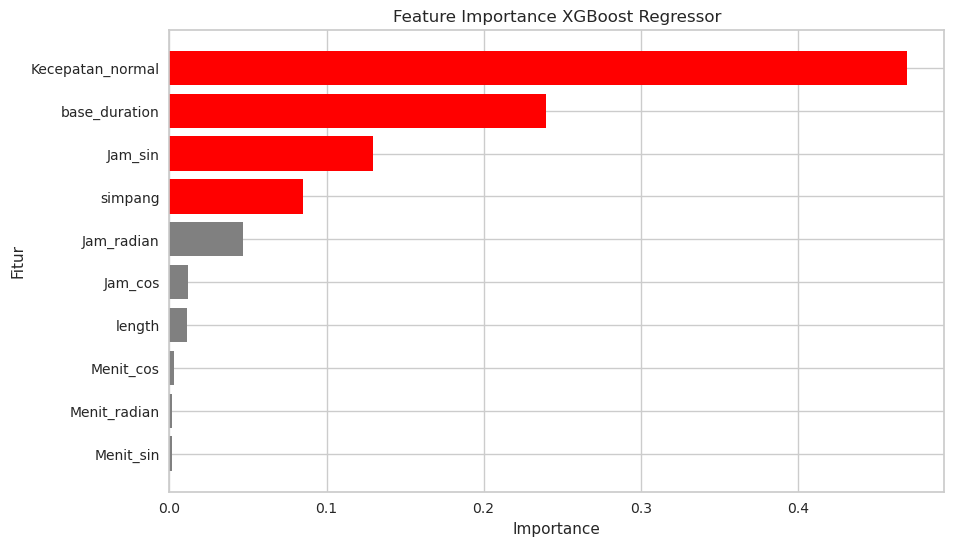

In [42]:
# Dapatkan nilai fitur importance
xgb_model_tuning.fit(X_regresi, y_regresi)
feature_importance = xgb_model_tuning.feature_importances_
feature_names = X_regresi.columns
# Visualisasikan fitur importance secara horizontal
# Buat DataFrame untuk menyimpan fitur importance dan nama fitur
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Urutkan berdasarkan fitur importance secara menurun
importance_df = importance_df.sort_values(by='Importance', ascending=False)
colors = ['red' if imp > 0.05 else 'gray' for imp in importance_df['Importance']]
# Visualisasikan fitur importance secara horizontal (terbesar ke terkecil)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.title('Feature Importance XGBoost Regressor')
plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting ada di atas
plt.savefig('fitur_importance_regresi.jpg', bbox_inches='tight')
plt.show()

# Modelling Klasifikasi



In [32]:
X_klasifikasi, y_klasifikasi =df_final_fix.drop(columns=['cluster','travel_time_seconds']), df_final_fix['cluster']
print(X_klasifikasi.shape)
print(y_klasifikasi.shape)

(1700, 10)
(1700,)


# XGboost

In [23]:
X,y = X_klasifikasi, y_klasifikasi
from sklearn.model_selection import KFold
# Inisialisasi list untuk menyimpan hasil evaluasi
accuracies = []
precisions = []
recalls = []
f1_scores = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the XGBoost classifier on the training data
    xgb_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = xgb_classifier.predict(X_test)

    # Evaluate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# 4. Hitung dan Tampilkan Hasil Evaluasi
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Mean Precision: {:.2f}%".format(mean_precision* 100))
print("Mean Recall: {:.2f}%".format(mean_recall* 100))
print("Mean F1 Score: {:.2f}%".format(mean_f1_score* 100))

NameError: name 'xgb_classifier' is not defined

In [40]:
from time import time
import pprint
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
import xgboost as xgb  # Import XGBoost

# A wrapper for measuring time and performances of different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

# Setting the search space for XGBoostClassifier
search_spaces = {
    'n_estimators': Integer(10, 200),
    'learning_rate': Real(0.01, 1.0),
    'max_depth': Integer(1, 20),
    'min_child_weight': Real(0.1, 10),
    'subsample': Real(0.1, 1.0),
    'colsample_bytree': Real(0.1, 1.0)
}

# Create an XGBoostClassifier
xgb_classifier = xgb.XGBClassifier(random_state=42)  # Mengganti dengan XGBoostClassifier

# Create BayesSearchCV object
opt = BayesSearchCV(
    xgb_classifier,  # Menggunakan XGBoostClassifier
    search_spaces,
    scoring='accuracy',  # Menggunakan metrik 'accuracy' untuk klasifikasi
    cv=kf,
    n_jobs=1,
    n_iter=100,
    return_train_score=False,
    refit=True,
    verbose=100
)

# Report the best parameters
best_params = report_perf(opt, X_klasifikasi, y_klasifikasi, 'XGBoost Classifier')

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START colsample_bytree=0.7113129554952367, learning_rate=0.2485439813915831, max_depth=16, min_child_weight=7.090249159237226, n_estimators=117, subsample=0.27861737728931235
[CV 1/5; 1/1] END colsample_bytree=0.7113129554952367, learning_rate=0.2485439813915831, max_depth=16, min_child_weight=7.090249159237226, n_estimators=117, subsample=0.27861737728931235;, score=0.959 total time=   0.2s
[CV 2/5; 1/1] START colsample_bytree=0.7113129554952367, learning_rate=0.2485439813915831, max_depth=16, min_child_weight=7.090249159237226, n_estimators=117, subsample=0.27861737728931235
[CV 2/5; 1/1] END colsample_bytree=0.7113129554952367, learning_rate=0.2485439813915831, max_depth=16, min_child_weight=7.090249159237226, n_estimators=117, subsample=0.27861737728931235;, score=0.947 total time=   0.2s
[CV 3/5; 1/1] START colsample_bytree=0.7113129554952367, learning_rate=0.2485439813915831, max_depth=16, min_child_weight=7

In [33]:
X,y = X_klasifikasi, y_klasifikasi
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi list untuk menyimpan hasil evaluasi
accuracies = []
precisions = []
recalls = []
f1_scores = []
import xgboost as xgb
xgb_classifier_tuning = xgb.XGBClassifier(random_state=42,colsample_bytree=0.5791965291341358,
                                         learning_rate=1.0,max_depth=14,min_child_weight=0.1,
                                         n_estimators=59,subsample=1.0) 
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the XGBoost classifier on the training data
    xgb_classifier_tuning.fit(X_train, y_train)

    # Predict on the test data
    y_pred = xgb_classifier_tuning.predict(X_test)

    # Evaluate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# 4. Hitung dan Tampilkan Hasil Evaluasi
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Mean Precision: {:.2f}%".format(mean_precision* 100))
print("Mean Recall: {:.2f}%".format(mean_recall* 100))
print("Mean F1 Score: {:.2f}%".format(mean_f1_score* 100))

Mean Accuracy: 94.65%
Mean Precision: 94.70%
Mean Recall: 94.65%
Mean F1 Score: 94.63%


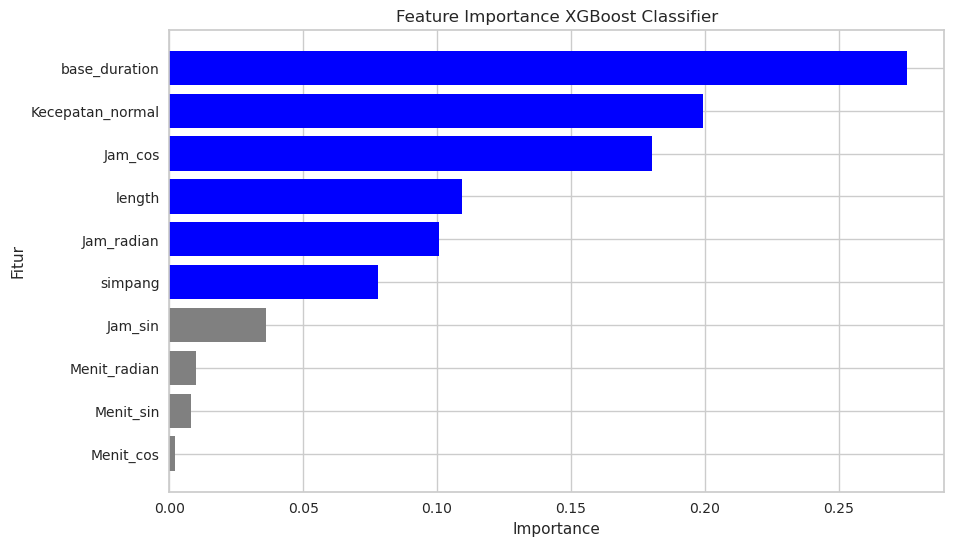

In [34]:
# Dapatkan nilai fitur importance
xgb_classifier_tuning.fit(X_klasifikasi, y_klasifikasi)
feature_importance = xgb_classifier_tuning.feature_importances_
feature_names = X_klasifikasi.columns
# Visualisasikan fitur importance secara horizontal
# Buat DataFrame untuk menyimpan fitur importance dan nama fitur
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Urutkan berdasarkan fitur importance secara menurun
importance_df = importance_df.sort_values(by='Importance', ascending=False)
colors = ['blue' if imp > 0.05 else 'gray' for imp in importance_df['Importance']]
# Visualisasikan fitur importance secara horizontal (terbesar ke terkecil)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'],color=colors)
plt.xlabel('Importance')
plt.ylabel('Fitur')
plt.title('Feature Importance XGBoost Classifier')
plt.gca().invert_yaxis()  # Membalik urutan fitur agar yang paling penting ada di atas
plt.savefig('fitur_importance.jpg', bbox_inches='tight')
plt.show()

In [35]:
import pickle 
pickle.dump(xgb_classifier_tuning,open('prediksi_cluster.sav','wb'))

In [36]:
xgb_classifier_tuning.feature_names_in_

array(['base_duration', 'length', 'simpang', 'Kecepatan_normal',
       'Jam_radian', 'Menit_radian', 'Jam_sin', 'Jam_cos', 'Menit_sin',
       'Menit_cos'], dtype='<U16')

In [41]:
X,y = X_klasifikasi, y_klasifikasi
# Inisialisasi list untuk menyimpan hasil evaluasi
accuracies = []
precisions = []
recalls = []
f1_scores = []
rf_classifier = RandomForestClassifier(random_state=42)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the XGBoost classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_classifier.predict(X_test)

    # Evaluate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# 4. Hitung dan Tampilkan Hasil Evaluasi
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Mean Precision: {:.2f}%".format(mean_precision* 100))
print("Mean Recall: {:.2f}%".format(mean_recall* 100))
print("Mean F1 Score: {:.2f}%".format(mean_f1_score* 100))

Mean Accuracy: 94.59%
Mean Precision: 94.63%
Mean Recall: 94.59%
Mean F1 Score: 94.57%


In [35]:
from time import time
import pprint
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier  # Mengganti dengan RandomForestClassifier

# A wrapper for measuring time and performances of different optimizers
def report_perf(optimizer, X, y, title, callbacks=None):
    start = time()
    if callbacks:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
    best_score = optimizer.best_score_
    best_score_std = optimizer.cv_results_['std_test_score'][optimizer.best_index_]
    best_params = optimizer.best_params_
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           +u"\u00B1"+" %.3f") % (time() - start,
                                  len(optimizer.cv_results_['params']),
                                  best_score,
                                  best_score_std))
    print('Best parameters:')
    pprint.pprint(best_params)
    print()
    return best_params

# Setting the search space for RandomForestClassifier
search_spaces = {
    'n_estimators': Integer(10, 200),
    'max_depth': Integer(1, 20),
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 10),
    'max_features': Real(0.1, 1.0),
    'min_impurity_decrease': Real(0.0, 1.0)
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create BayesSearchCV object
opt = BayesSearchCV(
    rf_classifier,  # Menggunakan RandomForestClassifier
    search_spaces,
    scoring='accuracy',  # Menggunakan metrik 'accuracy' untuk klasifikasi
    cv=kf,
    n_jobs=1,
    n_iter=100,
    return_train_score=False,
    refit=True,
    verbose=100
)

# Report the best parameters
best_params = report_perf(opt, X_klasifikasi, y_klasifikasi, 'Random Forest Classifier')


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=3, max_features=0.7940911054730476, min_impurity_decrease=0.9772309532222592, min_samples_leaf=9, min_samples_split=8, n_estimators=122
[CV 1/5; 1/1] END max_depth=3, max_features=0.7940911054730476, min_impurity_decrease=0.9772309532222592, min_samples_leaf=9, min_samples_split=8, n_estimators=122;, score=0.362 total time=   0.3s
[CV 2/5; 1/1] START max_depth=3, max_features=0.7940911054730476, min_impurity_decrease=0.9772309532222592, min_samples_leaf=9, min_samples_split=8, n_estimators=122
[CV 2/5; 1/1] END max_depth=3, max_features=0.7940911054730476, min_impurity_decrease=0.9772309532222592, min_samples_leaf=9, min_samples_split=8, n_estimators=122;, score=0.371 total time=   0.3s
[CV 3/5; 1/1] START max_depth=3, max_features=0.7940911054730476, min_impurity_decrease=0.9772309532222592, min_samples_leaf=9, min_samples_split=8, n_estimators=122
[CV 3/5; 1/1] END max_depth=3, max_features=0.794

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=17

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=20, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=20

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=0.1, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=17

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=16, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=16

/opt/conda/lib/python3.10/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 1/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.959 total time=   0.0s
[CV 2/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 2/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.950 total time=   0.0s
[CV 3/5; 1/1] START max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10
[CV 3/5; 1/1] END max_depth=17, max_features=1.0, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.924 total time=   0.0s
[CV 4/5; 1/1] START max_depth=17

In [26]:
X,y = X_klasifikasi, y_klasifikasi
# Inisialisasi list untuk menyimpan hasil evaluasi
from sklearn.ensemble import RandomForestClassifier
accuracies = []
precisions = []
recalls = []
f1_scores = []
rf_classifier_tuning = RandomForestClassifier(random_state=42,max_depth=20,max_features=0.9229359788094262,
                                      min_impurity_decrease=0,min_samples_leaf=1,min_samples_split=2,
                                      n_estimators=67)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Train the XGBoost classifier on the training data
    rf_classifier_tuning.fit(X_train, y_train)

    # Predict on the test data
    y_pred = rf_classifier_tuning.predict(X_test)

    # Evaluate accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

# 4. Hitung dan Tampilkan Hasil Evaluasi
mean_accuracy = sum(accuracies) / len(accuracies)
mean_precision = sum(precisions) / len(precisions)
mean_recall = sum(recalls) / len(recalls)
mean_f1_score = sum(f1_scores) / len(f1_scores)

print("Mean Accuracy: {:.2f}%".format(mean_accuracy * 100))
print("Mean Precision: {:.2f}%".format(mean_precision* 100))
print("Mean Recall: {:.2f}%".format(mean_recall* 100))
print("Mean F1 Score: {:.2f}%".format(mean_f1_score* 100))

Mean Accuracy: 95.65%
Mean Precision: 95.71%
Mean Recall: 95.65%
Mean F1 Score: 95.63%
